In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [124]:
blackfriday = pd.read_csv('blackfriday.csv')


In [125]:
blackfriday.shape

(537577, 12)

In [126]:
blackfriday.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Status
0,1000001,P00069042,Female,0-17,10,A,2,3,NaN,NaN,8370,Unmarried
1,1000001,P00248942,Female,0-17,10,A,2,1,6.0,14.0,15200,Unmarried
2,1000001,P00087842,Female,0-17,10,A,2,12,NaN,NaN,1422,Unmarried
3,1000001,P00085442,Female,0-17,10,A,2,12,14.0,NaN,1057,Unmarried
4,1000002,P00285442,Male,55+,16,C,4+,8,NaN,NaN,7969,Unmarried


In [127]:
temp = blackfriday.drop(columns=['Product_Category_3','User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Purchase','Marital_Status'],axis=1)
temp.dropna(inplace=True)

In [140]:
counts = temp.groupby(['Product_Category_1' ,'Product_Category_2']).size().sort_values(ascending=False)
print(counts)

Product_Category_1  Product_Category_2
1                   2.0                   48481
5                   8.0                   31115
                    14.0                  25147
8                   14.0                  20412
1                   15.0                  18281
                                          ...  
6                   13.0                     39
14                  18.0                     33
3                   13.0                     25
5                   10.0                      2
10                  11.0                      1
Length: 87, dtype: int64


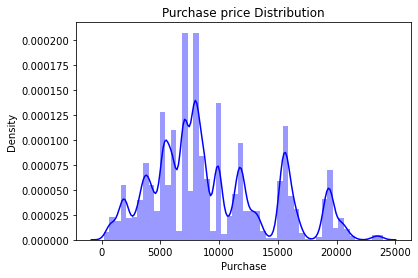

In [81]:
sns.distplot(blackfriday["Purchase"],color="blue")
plt.title("Purchase price Distribution")
plt.show()

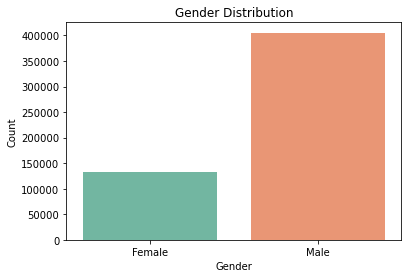

In [98]:
sns.countplot(blackfriday['Gender'],palette="Set2")
plt.ylabel('Count')
plt.title("Gender Distribution")
plt.show()

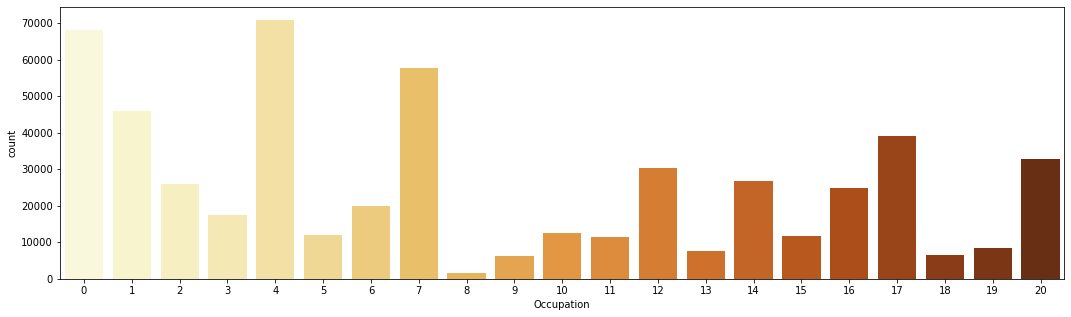

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(blackfriday['Occupation'],palette="YlOrBr")
plt.show()

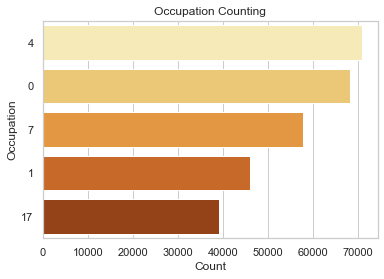

In [105]:
sns.set_theme(style="whitegrid")
sns.countplot(y=blackfriday['Occupation'],palette="YlOrBr",order=pd.value_counts(blackfriday['Occupation']).iloc[:5].index)
plt.xlabel('Count')
plt.title("Occupation Counting")
plt.show()

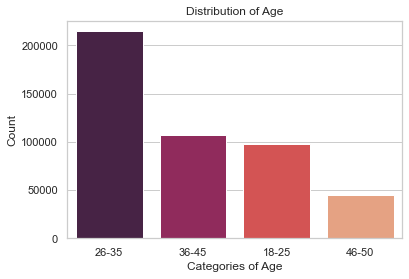

In [150]:
sns.countplot(blackfriday['Age'],palette="rocket",order=pd.value_counts(blackfriday['Age']).iloc[:4].index)
plt.title('Distribution of Age')
plt.xlabel('Categories of Age')
plt.ylabel('Count')
plt.show()

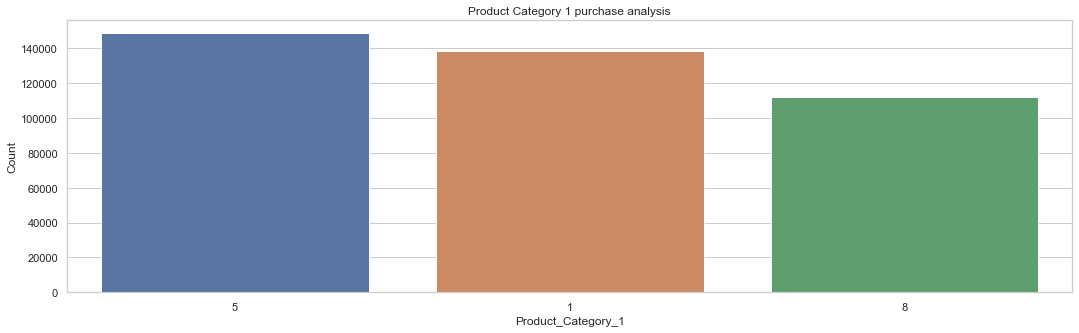

In [147]:
plt.figure(figsize=(18,5))
sns.countplot(blackfriday['Product_Category_1'],order=pd.value_counts(blackfriday['Product_Category_1']).iloc[:3].index)
plt.title("Product Category 1 purchase analysis")
plt.ylabel("Count")
plt.show()

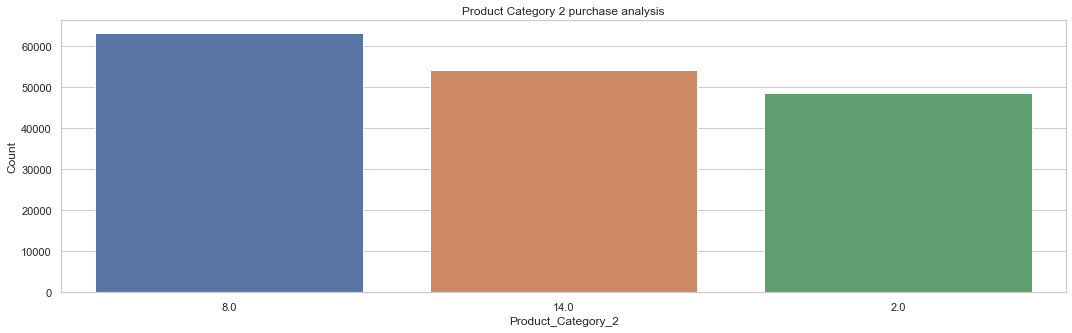

In [148]:
plt.figure(figsize=(18,5))
sns.countplot(blackfriday['Product_Category_2'],order=pd.value_counts(blackfriday['Product_Category_2']).iloc[:3].index)
plt.title("Product Category 2 purchase analysis")
plt.ylabel("Count")
plt.show()

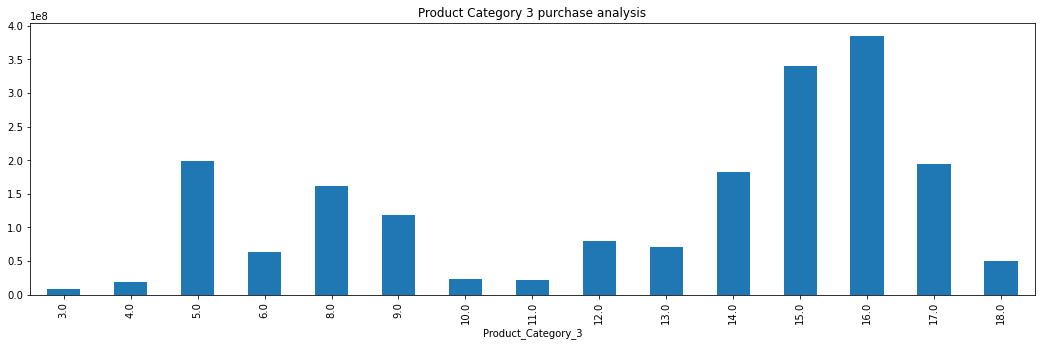

In [85]:
blackfriday.groupby('Product_Category_3').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product Category 3 purchase analysis")
plt.show()

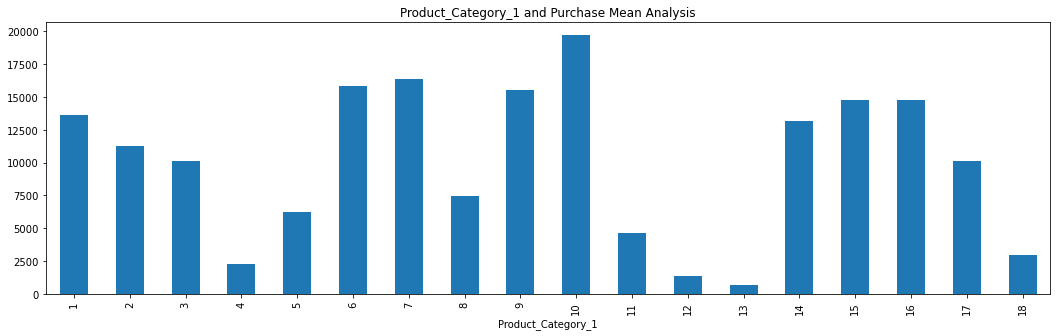

In [86]:
blackfriday.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

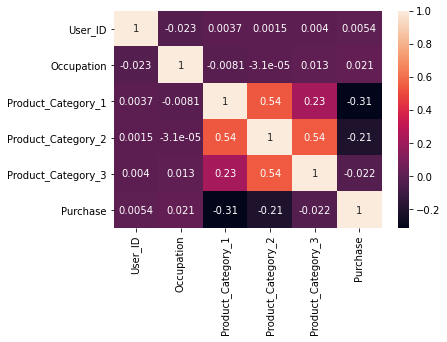

In [87]:
sns.heatmap(blackfriday.corr(),annot=True)
plt.show()

Text(0.5, 1.0, 'City Category VS Purchase')

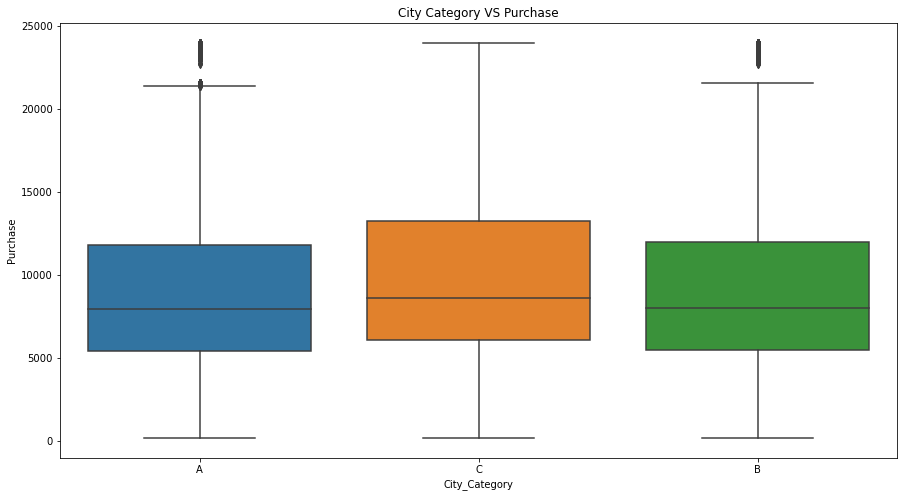

In [88]:
plt.figure(figsize=(15,8))
sns.boxplot(x='City_Category', y='Purchase', data=blackfriday)
plt.title('City Category VS Purchase')

<AxesSubplot:title={'center':'City Categry'}, ylabel='Purchase'>

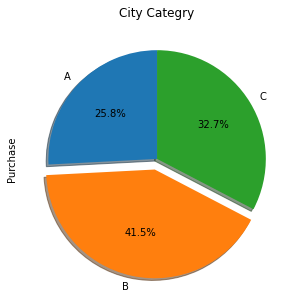

In [89]:
plt.figure(figsize = (10, 5))
blackfriday.groupby("City_Category")["Purchase"].sum().plot.pie(title = "City Categry", 
                                                               startangle = 90, explode = (0, 0.1, 0), 
                                                               autopct = "%1.1f%%", shadow = True)

<AxesSubplot:title={'center':'Years of staying in the city'}, ylabel='Stay_In_Current_City_Years'>

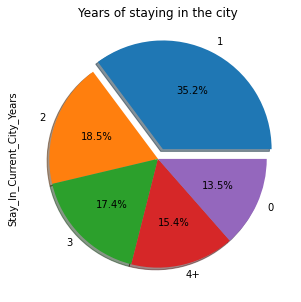

In [90]:
plt.figure(figsize = (10, 5))
blackfriday["Stay_In_Current_City_Years"].value_counts().plot.pie(title = "Years of staying in the city", 
                                                                 explode = (0.1, 0, 0, 0, 0), 
                                                                 autopct = "%1.1f%%", shadow = True)

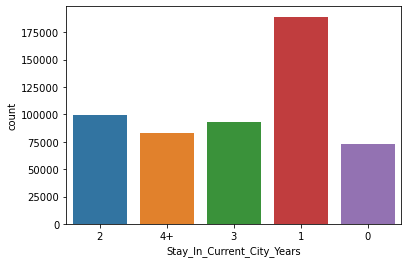

In [91]:
sns.countplot(blackfriday['Stay_In_Current_City_Years'])
plt.show()

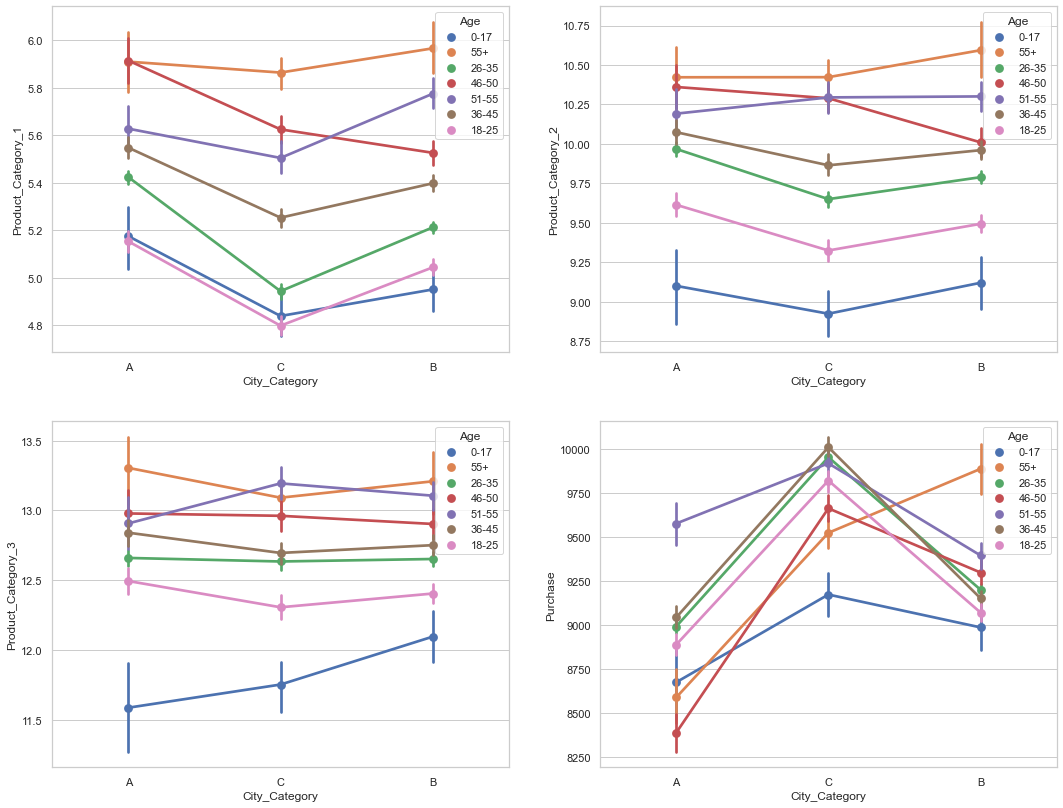

In [144]:
from turtle import title


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',
                 data=blackfriday,
                 ax=axes[0,0]
                )
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',
                 data=blackfriday,
                 ax=axes[0,1]
                )
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',
                 data=blackfriday,
                 ax=axes[1,0]
                )
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=blackfriday,
                 title="Relationship Between Purchase and City",
                 ax=axes[1,1]
                )

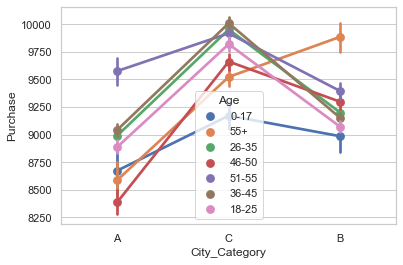

In [146]:
fig, axes = plt.subplots()
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=blackfriday,
                 title="Relationship Between Purchase and City"
                )

Text(0.5, 1.0, 'The Relationship between Marital Stauts & Purchase')

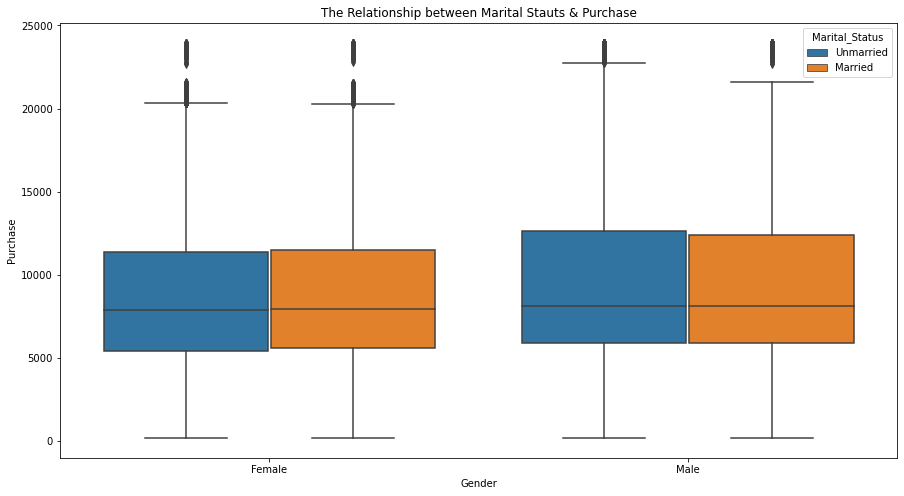

In [95]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Gender', y='Purchase', data=blackfriday, hue="Marital_Status")
plt.title('The Relationship between Marital Stauts & Purchase')